## Exercise 1

In [80]:
library(lubridate)
library(tibble)
library(tidyverse)

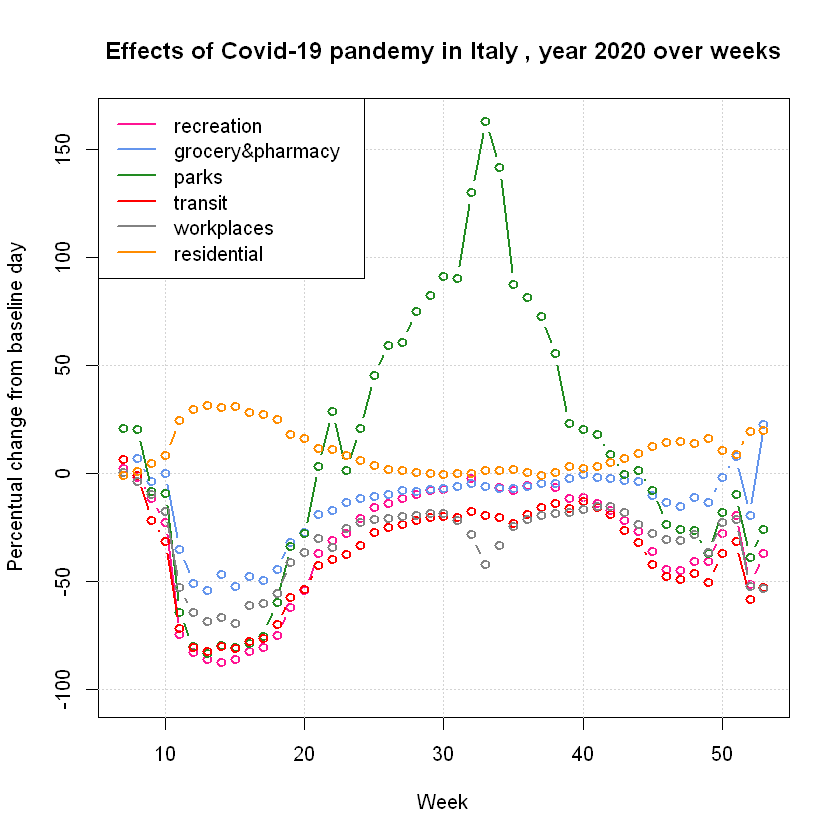

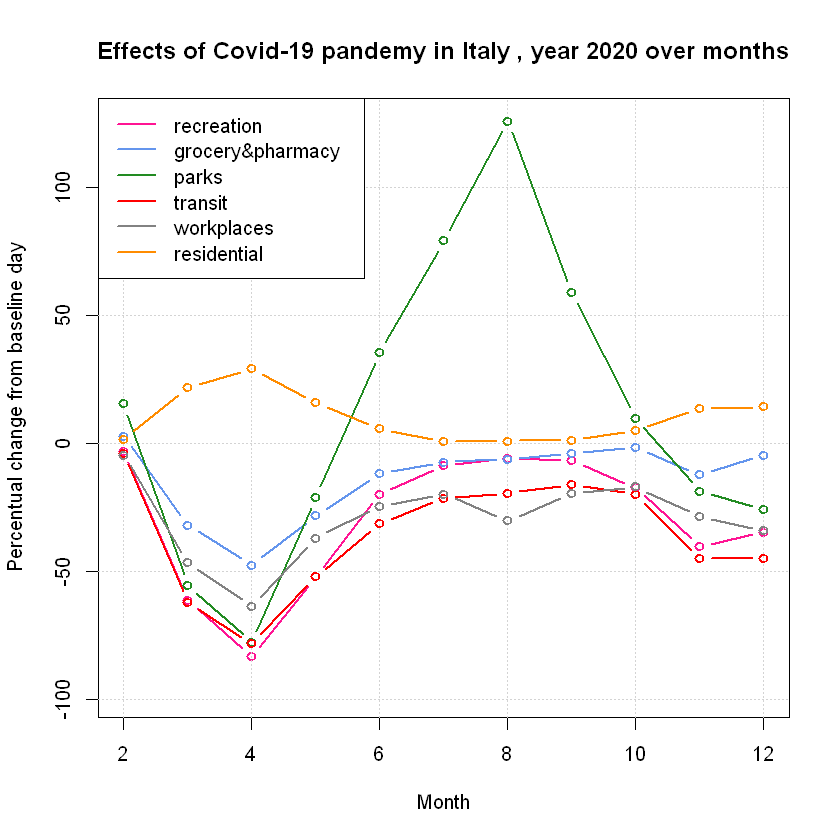

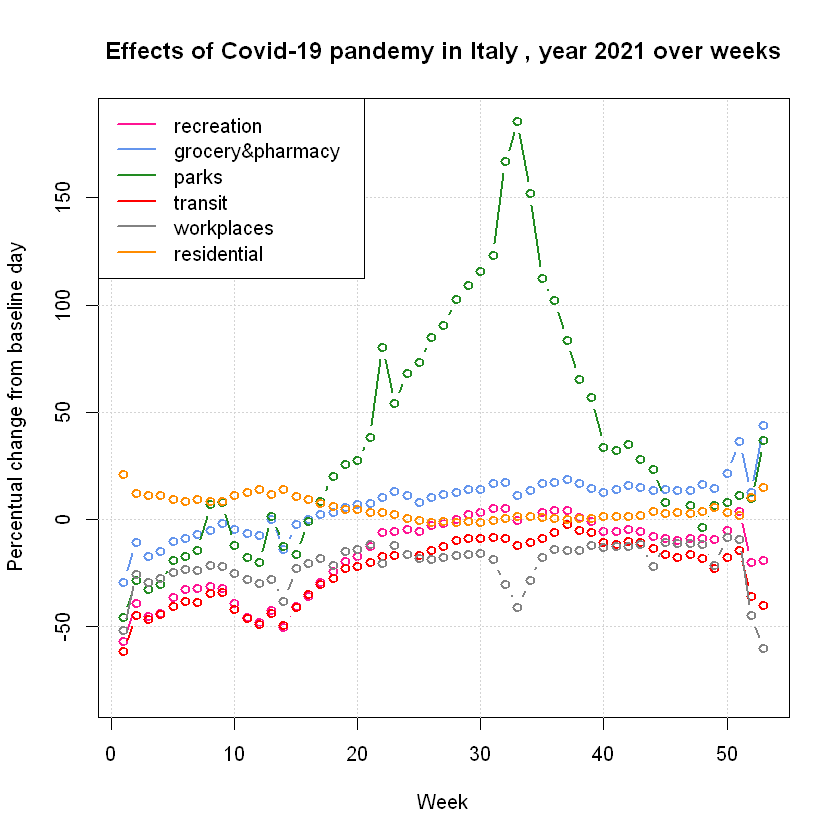

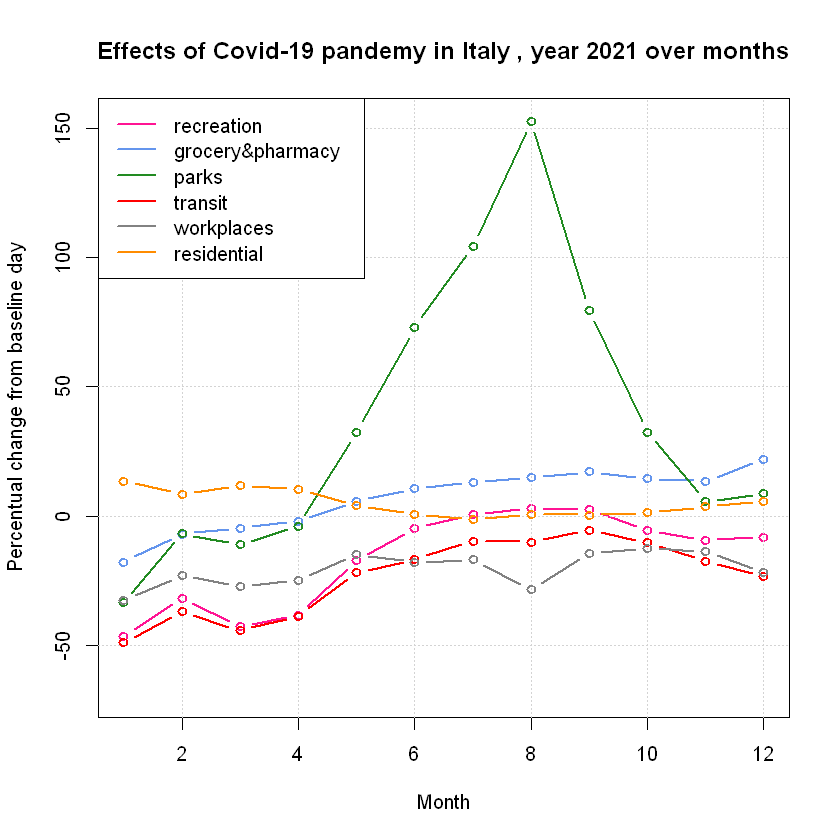

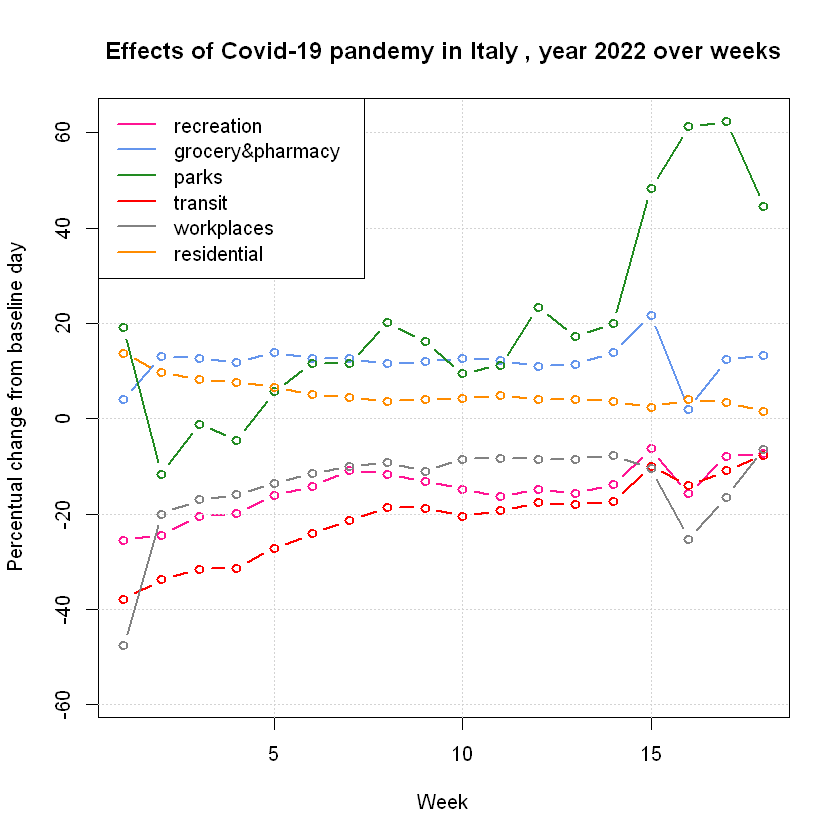

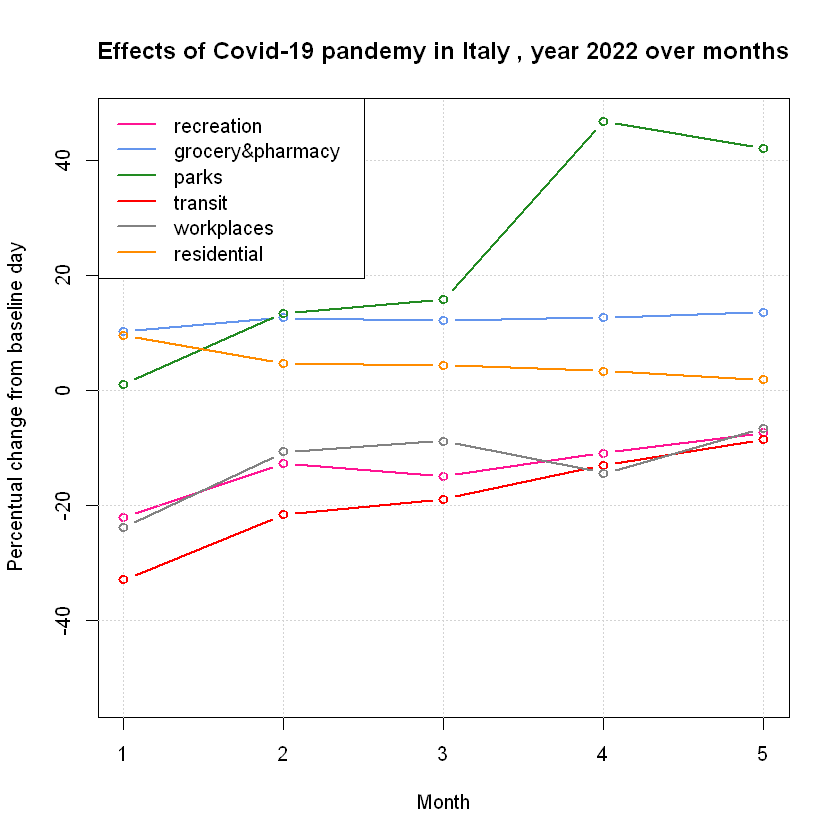

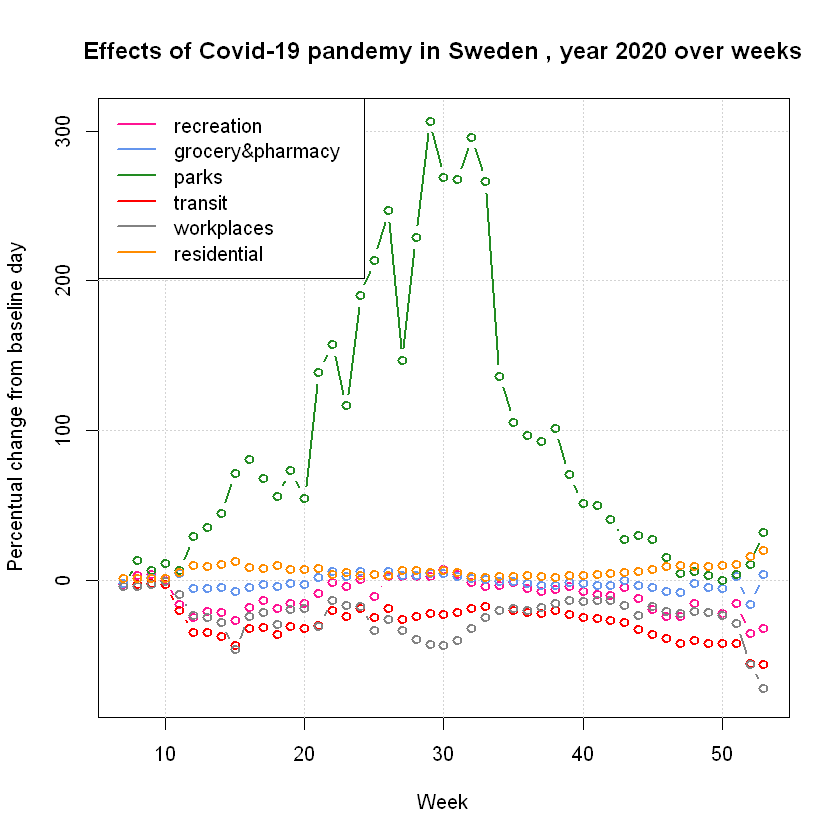

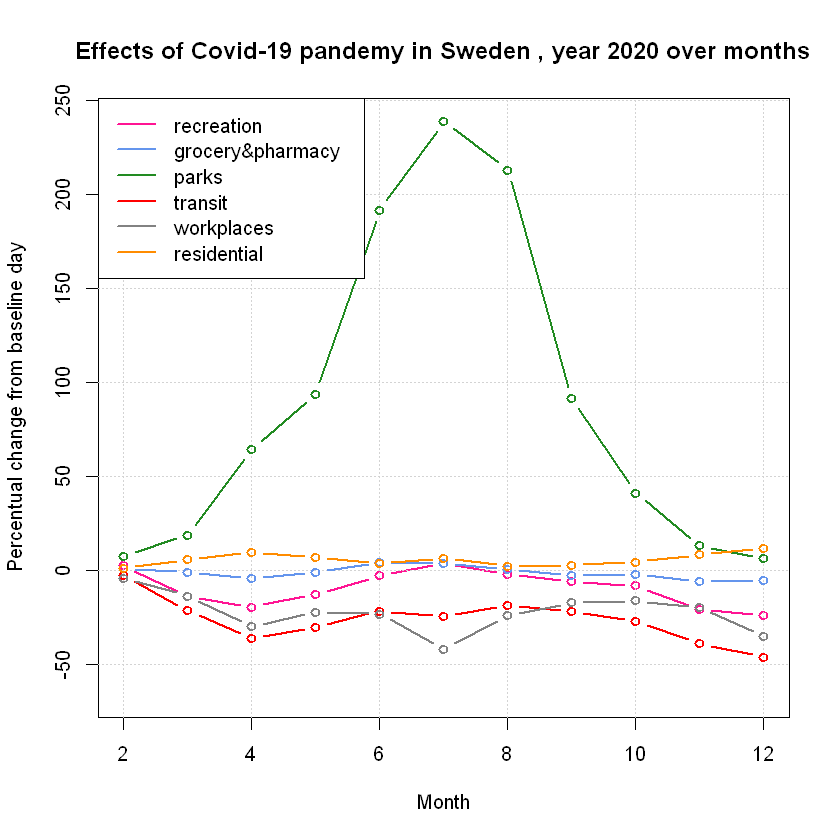

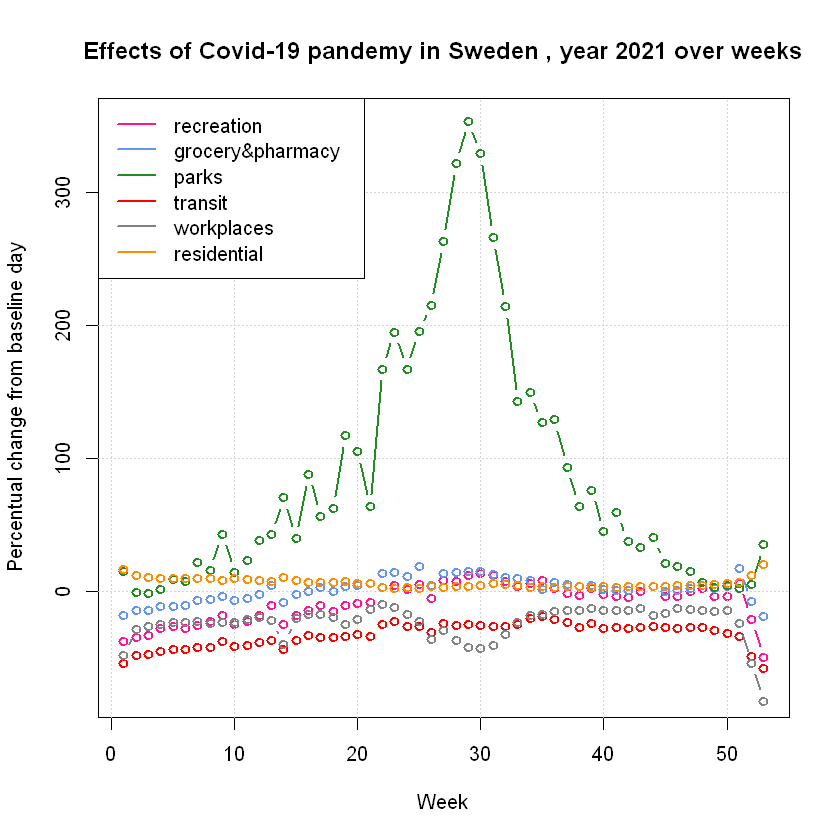

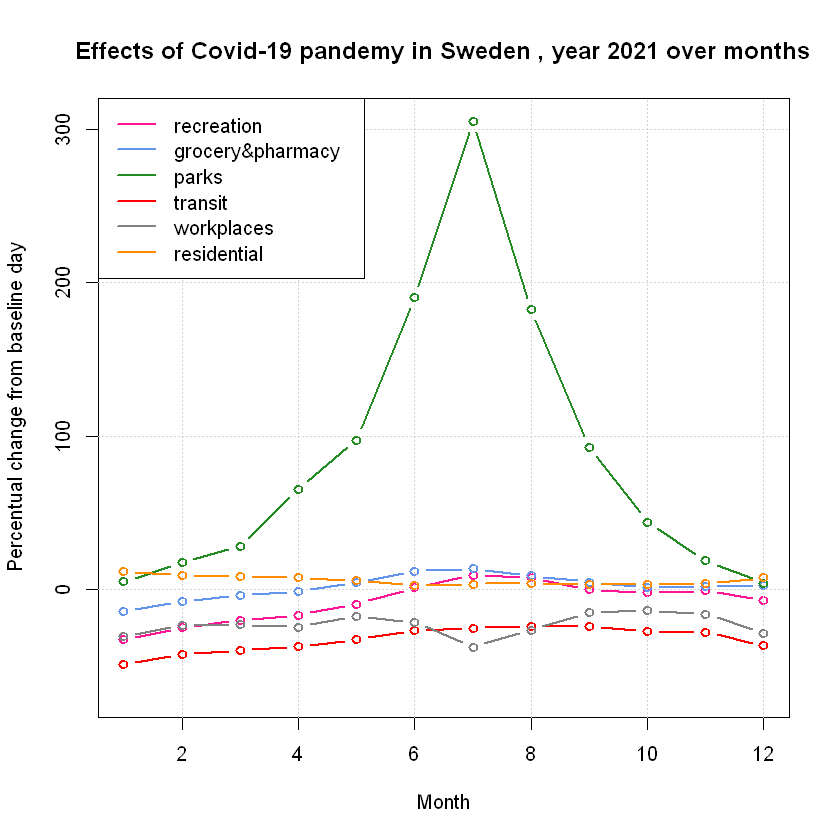

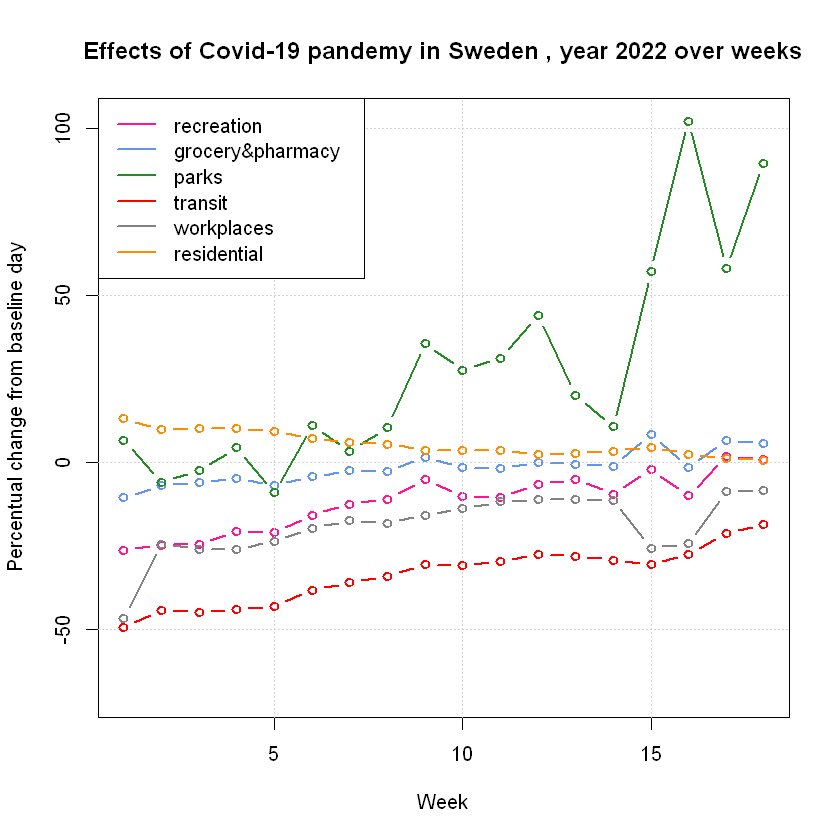

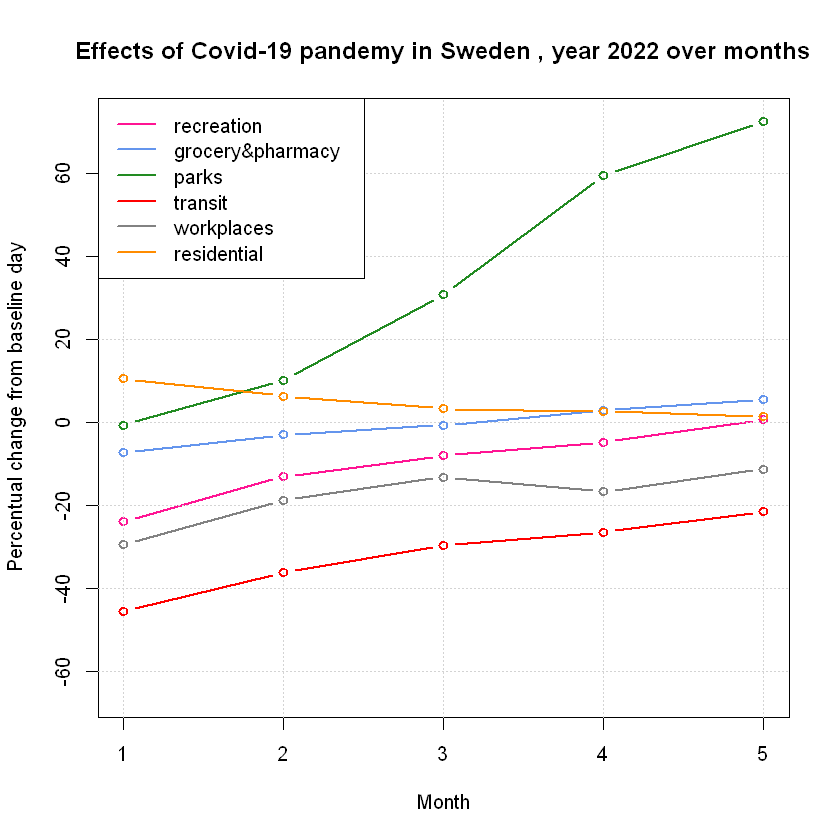

In [84]:
names <- c("recreation", "grocery&pharmacy", "parks", "transit", "workplaces", "residential")
colors <- c("deeppink", "cornflowerblue", "forestgreen", "red", "gray51", "darkorange")
data <- function(year,code,type){
    name <- paste(year,"_",code,"_Region_Mobility_Report.csv",sep="")
    path <- file.path("Region_Mobility_Report_CSVs",name)
    r <- read.csv(file=path)
    data0 <- as_tibble(r) #load as a tibble
    data_tot <- data0[(data0$sub_region_1==""), ] #remove regions
    #remove useless columns
    data_tot <- select(data_tot, -c(country_region_code, country_region, sub_region_1, sub_region_2, metro_area, iso_3166_2_code, census_fips_code, place_id))
    week <- lubridate::week(data_tot$date) #identify the week
    month <- lubridate::month(data_tot$date) #identify the month
    data_tot <- data_tot %>% add_column("week" = week, "month" = month, .before = "date" ) #add to the dataframe
    #I use aggregate to calculate the mean values over all columns
    data_week <-setNames(aggregate(list(data_tot$retail_and_recreation_percent_change_from_baseline,
                                        data_tot$grocery_and_pharmacy_percent_change_from_baseline,
                                        data_tot$parks_percent_change_from_baseline,
                                        data_tot$transit_stations_percent_change_from_baseline,
                                        data_tot$workplaces_percent_change_from_baseline,
                                        data_tot$residential_percent_change_from_baseline), 
                                        by = list(data_tot$week), FUN="mean"), c("week", names)) 
    data_month <-setNames(aggregate(list(data_tot$retail_and_recreation_percent_change_from_baseline,
                                        data_tot$grocery_and_pharmacy_percent_change_from_baseline,
                                        data_tot$parks_percent_change_from_baseline,
                                        data_tot$transit_stations_percent_change_from_baseline,
                                        data_tot$workplaces_percent_change_from_baseline,
                                        data_tot$residential_percent_change_from_baseline), 
                                        by = list(data_tot$month), FUN="mean"), c("month", names))
    if (code == "IT"){
        country <- "Italy"
    } else if (code == "SE"){
        country <- "Sweden"
    }
    if (type == "week"){
        index=2
        plot(data_week$week,data_week$recreation,type="b",lwd=2, col=colors[1],ylim=c((min(data_week$transit)-20),max(data_week$parks)),
            ylab="Percentual change from baseline day", xlab="Week",
            main=paste("Effects of Covid-19 pandemy in", country,", year",year,"over weeks"))
        grid()
        names_new <- names[-1]
        for (i in names_new){
            lines(data_week$week,data_week[[i]],type="b",lwd=2, col=colors[index])
            par(new=TRUE)
            index <- index +1
        }
        legend("topleft", col=colors, lty=1, lwd=2, legend=names)
    } else if (type == "month"){
        index=2
        plot(data_month$month,data_month$recreation,type="b",lwd=2, col=colors[1],ylim=c((min(data_month$transit)-20),max(data_month$parks)),
            ylab="Percentual change from baseline day", xlab="Month",
            main=paste("Effects of Covid-19 pandemy in", country,", year",year,"over months"))
        grid()
        names_new <- names[-1]
        for (i in names_new){
            lines(data_month$month,data_month[[i]],type="b",lwd=2, col=colors[index])
            par(new=TRUE)
            index <- index +1
        }
        legend("topleft", col=colors, lty=1, lwd=2, legend=names)
    }
}

year <- c("2020","2021","2022")
code <- c("IT","SE")
type <- c("week","month")
for (c in code){
    for (y in year){
        for (t in type){
            data(y,c,t)
        }
    }
}


## Exercise 2

In [7]:
RNG<-function(seed){
    l=length(unlist(strsplit(as.character(seed),"")))
    seed2<-seed*seed
    number <- unlist(strsplit(as.character(seed2),""))
    diff<-length(number)-l
    if (diff>0){
        tail<-diff/2
        r<-as.numeric(paste(number[(tail+1):(tail+l)],collapse=""))
    } else {
        r<-as.numeric(paste(number, collapse=""))
    }
    return(r)
}

N <- readline(prompt="Enter the seed: ")
N <- as.numeric(N)

cat("\nThe Middle Square Method generates:",RNG(N))

Enter the seed: 12345678

The Middle Square Method generates: 41576527

## Exercise 3

a) I assume for $y$ (the number of people who have seen the last issue of the journal) a Binomial Distribution with $n=150$, because each person can be considered an indipendent "experiment" whose success probability is represented by $p=\frac{29}{150}$. 

The analytical expression of the distribution (which is also the likelihood with $\theta = n,p$) is:
$$
P(y| n,p, M)=Bin\left(y,n=150,p=\frac{29}{150}\right)=\frac{150!}{y!(150-y)!}\left( \frac{29}{150} \right)^y \left(\frac{121}{150}\right)^{150-y}
$$

b) Since I have assumed that the likelihood is the binomial distribution, then if the prior $P(p|M)$ is uniform the Posterior should be proportional to the binomial distribution, because:
$$
P(p|y,n,M) \propto  P(y|n,p,M) \times P(p|M).
$$
Considering $A$ as a normalization factor, the Posterior is:
$$
P(p|y,n,M)=Bin(y,n,p)=\frac{1}{A}\frac{n!}{y!(n-y)!} p^y \left(1-p\right)^{n-y}
$$

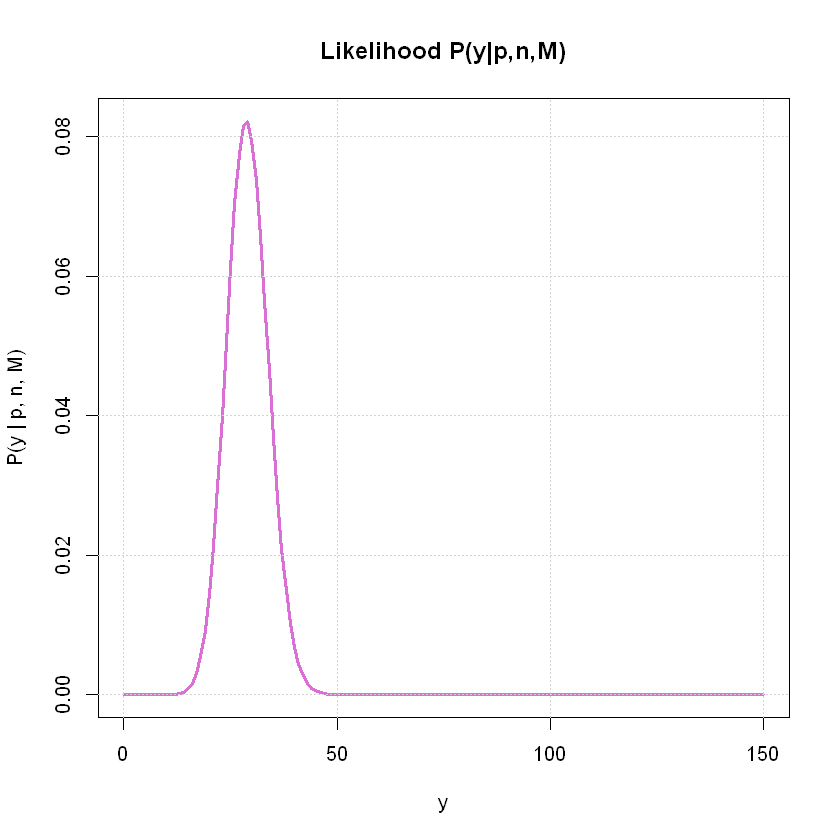

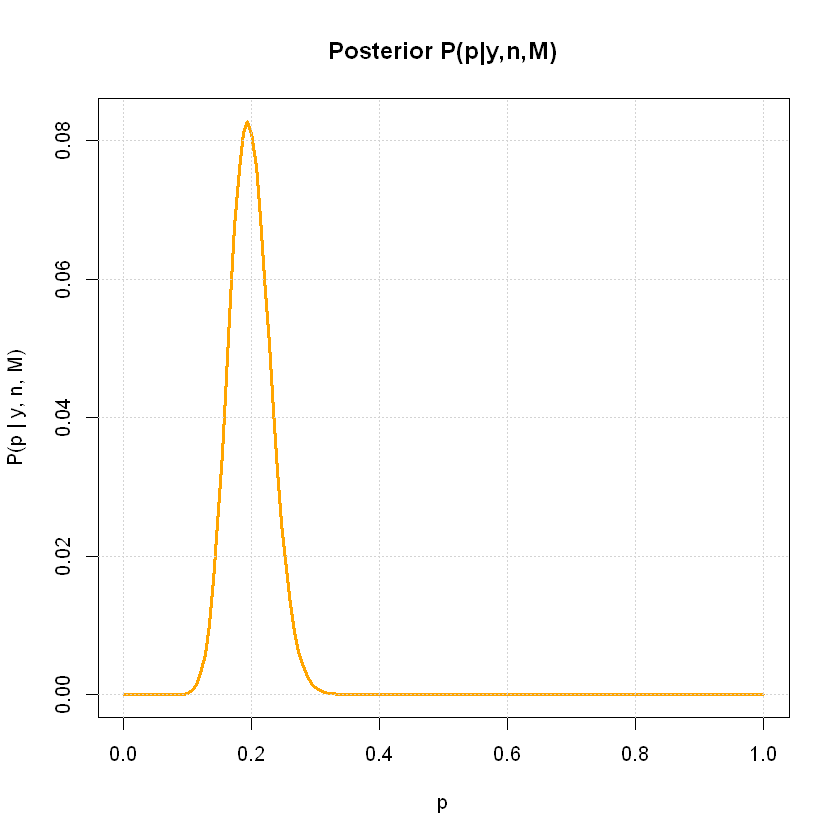

In [89]:
#c) Plot both posterior and likelihood ditributions functions
n <- 150
p <- 29/n
x <- seq(from=0,to=n,by=1)
prob <- seq(from=0,to=1,by=1/n)
likelihood <- dbinom(x, n, p)
posterior <- function(p){
    dbinom(29, n, prob)*dunif(p)
}

post <- function(p){
    posterior(p)/sum(posterior(prob))
}

plot(x, likelihood, type='l', lwd = 3, col = 'orchid', main="Likelihood P(y|p,n,M)", xlab="y", ylab="P(y | p, n, M)")
grid()
plot(prob, post(prob), type='l', lwd = 3, col = 'orange', main="Posterior P(p|y,n,M)", xlab="p", ylab="P(p | y, n, M)")
grid()

## Exercise 4


a) The likelihood chosen is a Binomial Distribution, since each trial is represented by the toss of the coin ($n=30$ is the number of trials) caractherized by the probability of success (for example, get "HEAD" instead of "CROSS") $p=1/2$ if the coin is not loaded. Under the same hypotesis, the Beta prior should have $\alpha_1=\beta_1=10$. 

Two different Priors produce two different Posteriors:
* if the Prior is a flat distribution, the Posterior will be a renormalized Binomial distribution 
* if the Prior is a Beta distribution, the Posterior will be a Beta with $\alpha_2=\alpha_1 + succ$, $\beta_2= \beta_1 + n - succ$


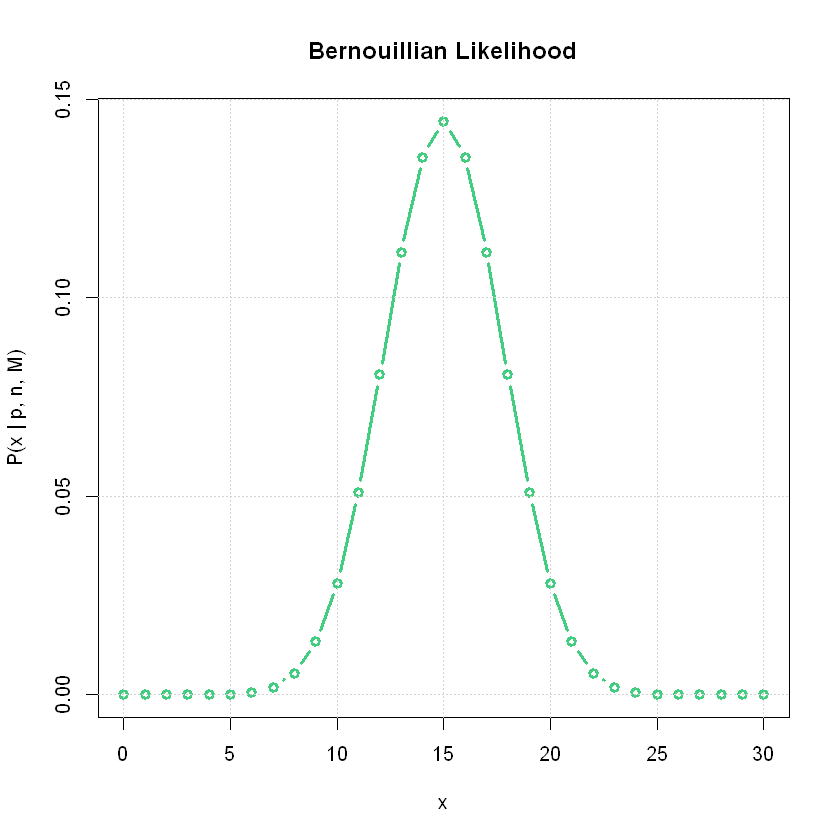

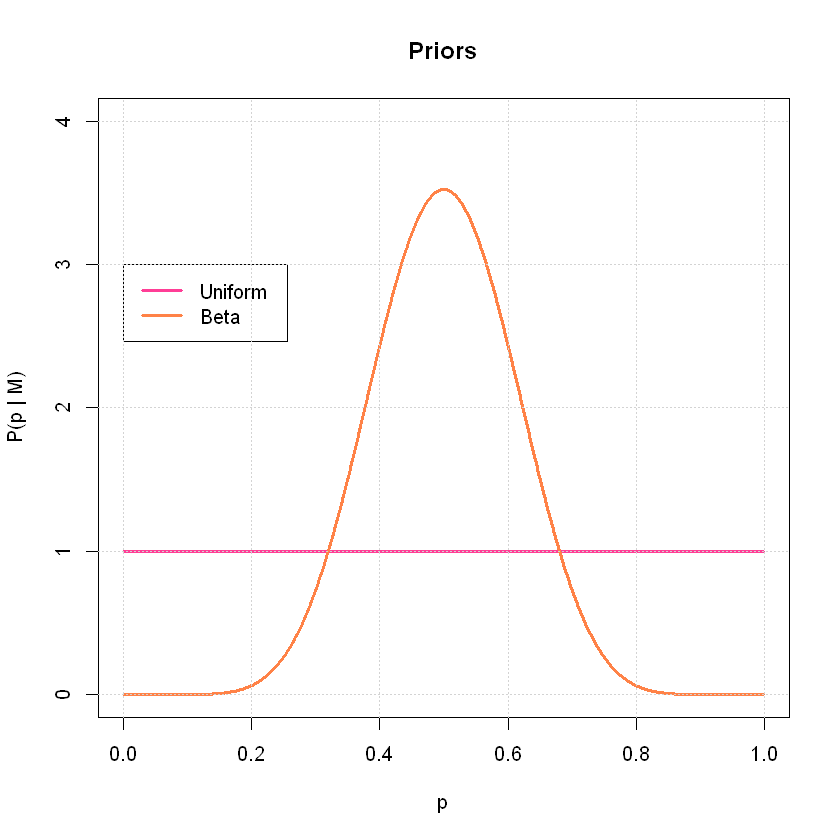

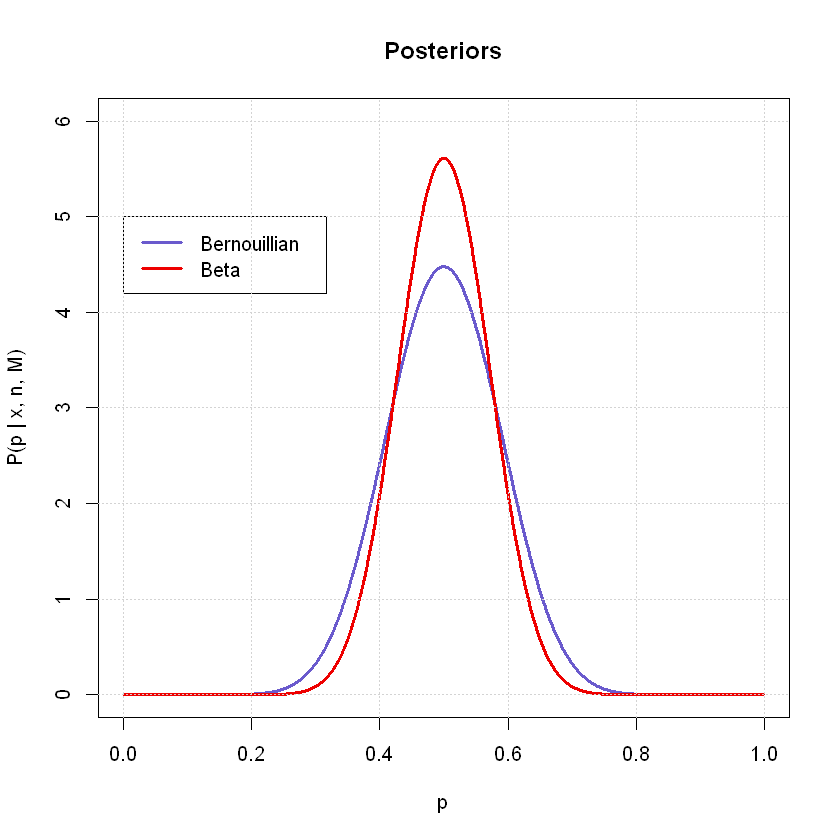

In [9]:
#I assume 0 as CROSS (failure) and 1 as HEAD (success)
trials <-  c(0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1)
succ <- sum(trials==1)
fail <- sum(trials==0)
n <- succ+fail
alpha <- 10
beta  <- 10
n.sample <- 2000
delta.p <- 1/n.sample
p <- seq(from=1/(2*n.sample),by=1/n.sample, length.out=n.sample)
x <- seq(0, 30)
likelihood <- dbinom(x, n, 1/2)
prior_beta <- dbeta(p, alpha, beta)
prior_flat <- dunif(p, 0, 1)
post_beta <- dbeta(x=p, alpha+succ, beta+n-succ)
flat_p <- dbinom(x=succ, size=n, prob=p)
post_bern <- flat_p/(delta.p*sum(flat_p))

plot(x, likelihood, type='b', lwd = 3, col = 'seagreen3', main="Bernouillian Likelihood", xlab="x", ylab="P(x | p, n, M)") #likelihood
grid()

plot(p, prior_flat, type='l', lwd = 3, col = 'violetred1', main="Priors", ylim=c(0,4), 
     xlab="p", ylab="P(p | M)") #uniform prior
lines(p, prior_beta, type='l', lwd = 3, col = 'sienna1') #beta prior
legend(0.0,3, col=c('violetred1','sienna1'), legend=c("Uniform", "Beta"), lty=1, lwd = 3)
grid()
   
plot(p, post_bern, type='l', lwd = 3, col = 'slateblue', main="Posteriors", ylim=c(0,6),
     xlab="p", ylab="P(p | x, n, M)") #bernouillian posterior
lines(p, post_beta, type='l', lwd = 3, col = 'red2') #beta posterior
legend(0.0,5, col=c('slateblue','red2'), legend=c("Bernouillian", "Beta"), lty=1, lwd = 3)
grid()

b) The credible intervals are considered symmetric, then I will remove the two equal-size tails, each one equals to 2.5% of the total area. The most probable value for the coin will be the mode of the distribution.

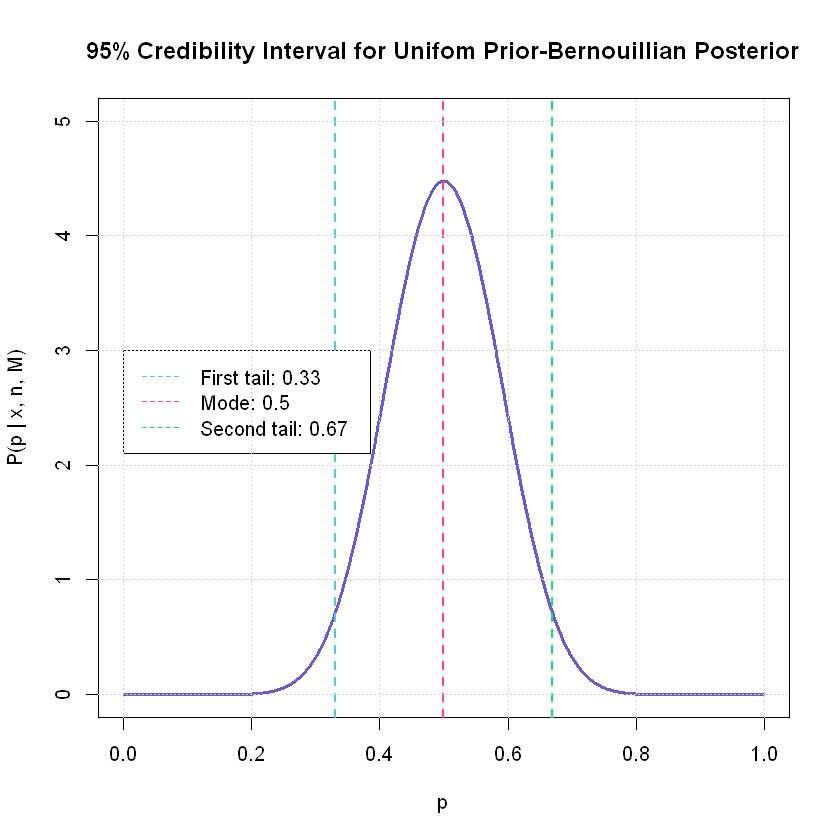

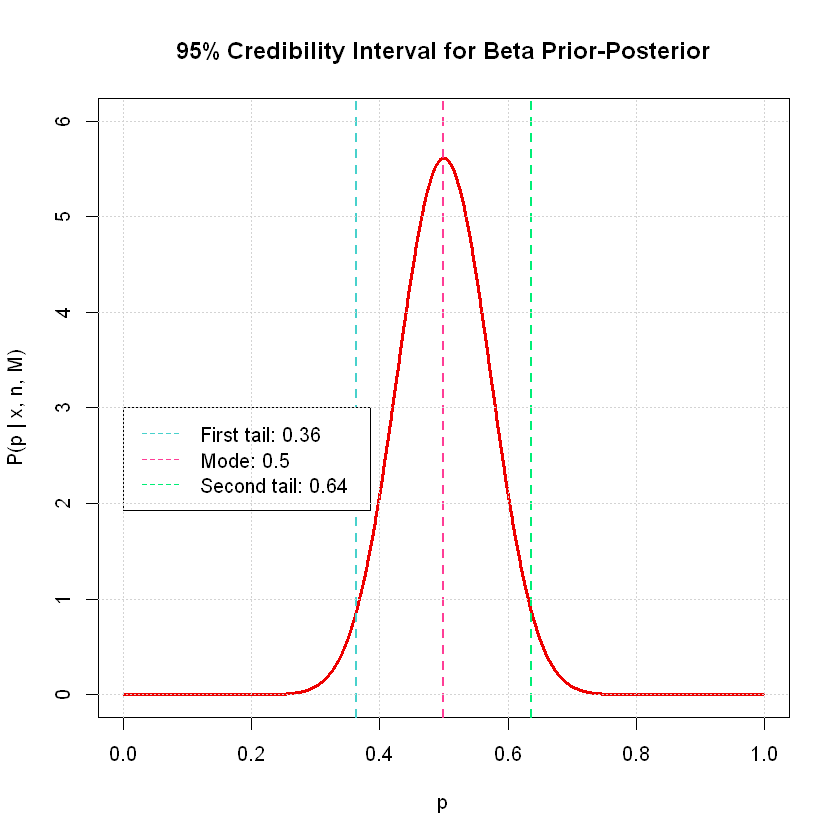

In [10]:
mode_beta <- p[which.max(post_beta)]
p1_beta <- qbeta(0.025, alpha+succ, beta+n-succ)
p2_beta <- qbeta(0.975, alpha+succ, beta+n-succ)
mode_bern <- p[which.max(post_bern)]
cum_bern <- cumsum(post_bern)/n.sample
p1_bern <- p[cum_bern>=0.025][1]
p2_bern <- p[cum_bern>=0.975][1]

plot(p, post_bern, type='l', lwd = 3, col = 'slateblue', main="95% Credibility Interval for Unifom Prior-Bernouillian Posterior",
     ylim=c(0,5), xlab="p", ylab="P(p | x, n, M)")
abline(v=mode_bern, col='violetred1', lty=2, lwd=2)
abline(v=p1_bern, col='mediumturquoise', lty=2, lwd=2)
abline(v=p2_bern, col='springgreen2', lty=2, lwd=2)
p1_bern_txt<-paste("First tail:",round(p1_bern,digits=2))
p2_bern_txt<-paste("Second tail:",round(p2_bern,digits=2))
mode_bern_txt<-paste("Mode:",round(mode_bern,digits=2))
legend(0.0, 3, col=c("mediumturquoise", "violetred1", "springgreen2"), lty=2, 
       legend = c(p1_bern_txt,mode_bern_txt,p2_bern_txt)
         )
grid()

plot(p, post_beta, type='l', lwd = 3, col = 'red2', main="95% Credibility Interval for Beta Prior-Posterior", 
     ylim=c(0,6), xlab="p", ylab="P(p | x, n, M)")
abline(v=mode_beta, col='violetred1', lty=2, lwd=2)
abline(v=p1_beta, col='mediumturquoise', lty=2, lwd=2)
abline(v=p2_beta, col='springgreen2', lty=2, lwd=2)
p1_beta_txt<-paste("First tail:",round(p1_beta,digits=2))
p2_beta_txt<-paste("Second tail:",round(p2_beta,digits=2))
mode_beta_txt<-paste("Mode:",round(mode_beta,digits=2))
legend(0.0, 3, col=c("mediumturquoise", "violetred1", "springgreen2"), lty=2, 
       legend = c(p1_beta_txt,mode_beta_txt,p2_beta_txt)
         )
grid()


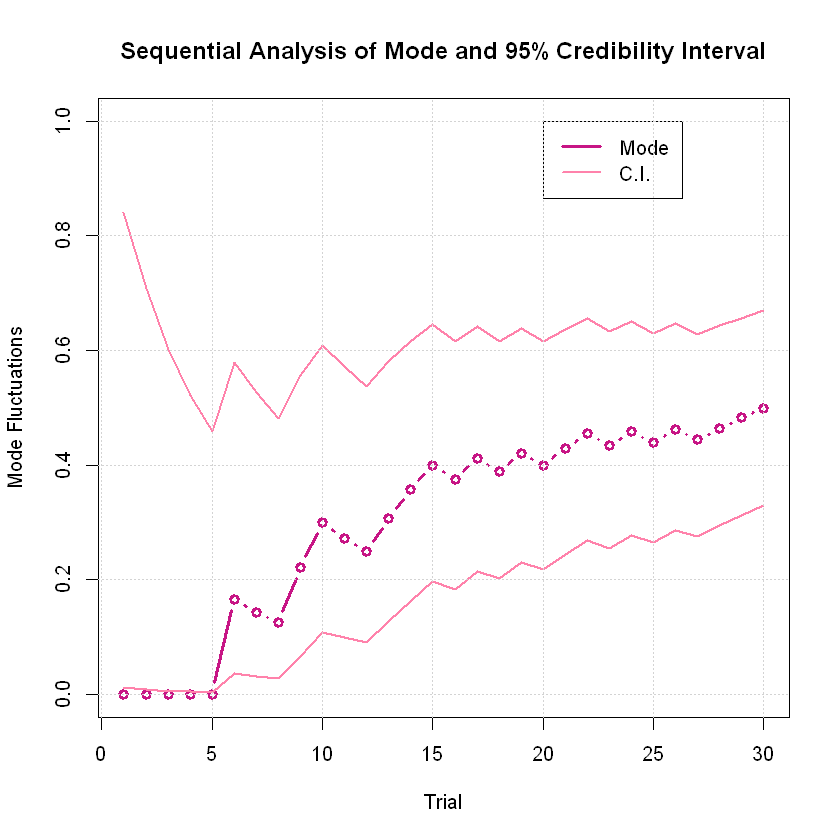

In [12]:
#c) Repeat the same analysis assuming a sequential analysis of the data. Show how the most probable value and 
# the credibility interval change as a function of the number of coin tosses (i.e. from 1 to 30).

prior <- dunif(p, 0, 1) #I choose an uniform distribution as the prior for the first toss, then the posterior of the first 
#toss will become the prior of the second toss and so on
range <- seq(from=1,to=length(trials),by=1)
modes <- vector() #collecting modes and tails for the plot
tail1 <- vector()
tail2 <- vector()

for(i in range){
    succ <- trials[i]
    like <- dbinom(succ, 1, p) #likelihood
    post <- like*prior
    posterior <- post/(delta.p*sum(post))
    
    modes[i] <- p[which.max(posterior)]
    cumulative <- cumsum(posterior)/n.sample
    tail1[i] <- p[cumulative>=0.025][1]
    tail2[i] <- p[cumulative>=0.975][1]
    prior <- posterior
}

plot(range, modes, lwd=3, ylim=c(0,1), type="b",col="mediumvioletred", main="Sequential Analysis of Mode and 95% Credibility Interval", xlab="Trial",
    ylab="Mode Fluctuations")
lines(range, tail1, lwd=2, col="palevioletred1")
lines(range, tail2, lwd=2, col="palevioletred1")
legend(20,1, col=c("mediumvioletred","palevioletred1"), lwd=c(3,2), legend=c("Mode","C.I."))
grid()


d) Do you get a different result, by analyzing the data sequentially with respect to a one-step analysis (i.e. considering all the data as a whole)?

For the one-step analysis, the mode and C.I. were:


In [13]:
cat("\nUniform Prior, Bernouillian Posterior:\nMode =", mode_bern,"\n95% C.I. = [", p1_bern, ",", p2_bern,"]")
cat("\nBeta Prior and Posterior:\nMode =", mode_beta,"\n95% C.I. = [", p1_beta, ",", p2_beta,"]")


Uniform Prior, Bernouillian Posterior:
Mode = 0.49975 
95% C.I. = [ 0.33075 , 0.66925 ]
Beta Prior and Posterior:
Mode = 0.49975 
95% C.I. = [ 0.3633783 , 0.6366217 ]

Analyzing the data sequentially, instead:

In [14]:
cat("\nSequential Analysis:\nMode =",modes[30],"\n95% C.I. = [",tail1[30],",",tail2[30],"]")


Sequential Analysis:
Mode = 0.49975 
95% C.I. = [ 0.33075 , 0.66925 ]

It can be observed that the modes found are exactly the same in all the three analysis, while the credibility intervals are equals only using a uniform prior to the one-step analysis.
